# Assignment 1 - Linear Algebra


In this exercise, you will investigate various aspects of linear algebra. You will study several different methods for solving simultaneous equations :
* matrix inversion using Cramer's rule
* LU decomposition
* SVD decomposition

The cell below contains the matrix inversion method based on Cramer's rule that you will have seen already in the Matrix Inversion notebook. You should use LU and SVD decomposition from SciPy.  See the Advanced Python Tutorial section 5.2.3, as well as the SciPy reference manual for further information :
https://docs.scipy.org/doc/scipy/reference/


In each part of this assignment, you will be asked to write some code in the cell indicated.  If you find it convenient to break your code up over multiple cells, please do so.  You will also be asked to briefly discuss your code and results obtained in a text cell.

You should use numpy and scipy libraries where appropriate. You will always be told explicitly if you should **not** use a particular library.  Make sure to comment your code.  Make sure all cells run from a freshly opened notebook before you submit your work.

In [4]:
import numpy as np
import math
import numpy.random as random
import scipy.linalg as linalg
import matplotlib.pyplot as plt
import time

def det2x2(m):
    if m.shape[0] != 2 or m.shape[1] != 2:
        raise Exception("Non2x2Matrix")
    
    return ( m[0][0]*m[1][1] ) - ( m[0][1]*m[1][0] )

def inverse2x2(m):
    if m.shape[0] != 2 or m.shape[1] != 2:
        raise Exception("Non2x2Matrix")

    det = det2x2(m)
    tmp = np.empty([2,2])
    tmp[0][0] = m[1][1] / det
    tmp[0][1] = -1 * m[0][1] / det
    tmp[1][0] = -1 * m[1][0] / det
    tmp[1][1] = m[0][0] / det
    return tmp

def submatrix(m,i,j):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")
    
    # create a new matrix
    n = m.shape[0]-1
    tmp = np.empty([n,n])
    
    # get the indices of the matrix that will be used
    tmpi = list(range(m.shape[0]))
    del tmpi[i]
    tmpj = list(range(m.shape[1]))
    del tmpj[j]
    
    for ii in range(n):
        for jj in range(n):
            tmp[ii][jj] = m[tmpi[ii]][tmpj[jj]]

    return tmp

def det(m):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")
    
    if (m.shape[0]==2):
        return det2x2(m)
        
    else:
        tmp = 0
        # use 0-th row to calculate determinant
        for j in range(m.shape[0]):
            tmp = tmp + (math.pow(-1,j) * m[0][j] * det(submatrix(m,0,j)))
    
    return tmp

def adj(m):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")
    
    tmp = np.empty(m.shape)
    
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            # note the order of indices below !
            tmp[j][i] = (math.pow(-1,i+j) * det(submatrix(m,i,j)))
    return tmp

def inverse(m):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")
    
    if m.shape[0]==2:
        return inverse2x2(m)
    
    d = det(m)        
    c = adj(m)
    return np.true_divide(c,d)


## Part 1

Plot the cpu-time taken to solve a randomly generated simultaneous equation as a function of the matrix order N, for each of the methods mentioned in the introduction.

Note that you will need to :
* generate both a random real NxN matrix, and a random RHS of the matrix equation, using `numpy.random` (see Advanced Python Tutorial section 4.1).
* handle problems that cannot be solved, eg. if the random matrix is singular.
* make sure that your treatment of each routine is "fair", in that each one solves the same problem.

It will take some time to generate results for this part of the assignment.  It is strongly recommended that you test your code for a small range of N initially, eg $2 \leq N \leq 4$, before moving to higher N. **You do not need to generate results using the Cramer's rule method for $N \ge 5$.**, although for LU and SVD decomposition methods, you should be able to generate results for higher N.

It is also strongly recommended that you generate results in one cell, and then analyse them in a separate cell, so you do not have to re-generate results when changing plot styles, for example).

In [8]:
# use this cell to write your code to generate results
def solveCramer(A,y):
    
    x = inverse(A) @ y
    return x

def solveLU(A,y):
    
    N = len(A)

    L,U = linalg.lu(A, permute_l=True)

    x = np.empty([N,1])

    x = linalg.inv(U) @ linalg.inv(L) @ y
    
    return x
    
def solveSVD(A,y):
    
    u,s,vh = linalg.svd(A)
    m,n = A.shape
    
    Sig = linalg.diagsvd(s,m,n)
    
    for i in range(m):
        for j in range(n):
            if i == j and Sig[i][j] !=0:    
                Sig[i][j] = 1/Sig[i][j]
    
    x = np.matrix.transpose(vh) @ np.matrix.transpose(Sig) @ np.matrix.transpose(u) @ y
    return x

def gen_matrix(N):
    #generates an NxN matrix
    
    #check it's not singular
    valid = False
    while valid != True:
        R = random.rand(N,N)
        detR = linalg.det(R)
        if detR != 0:
            valid = True
    
    return R

def gen_y(N):
    #generate y
    
    y = random.rand(N,1)
    
    return y


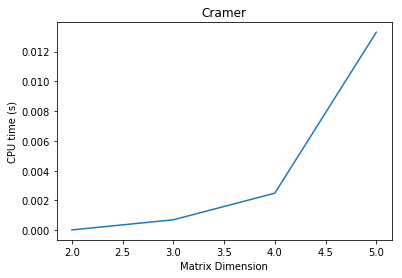

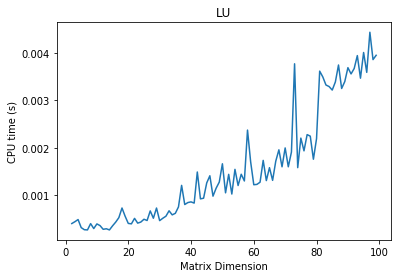

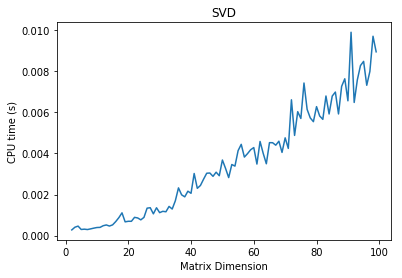

In [16]:
N = []
t_Cramer = []
t_LU = []
t_SVD = []

n_repeats = 1000

for i in range(2,100):
    A = gen_matrix(i)
    y = gen_y(i)
    N.append(i)
        
    Cramer_time_Total = 0
    LU_time_Total = 0
    SVD_time_Total = 0
    
    if i <= 5:
        for j in range(n_repeats):
            start = time.perf_counter()
            solveCramer(A,y)
            end = time.perf_counter()
            Cramer_time = end - start
            Cramer_time_Total += Cramer_time
        t_Cramer.append(Cramer_time_Total/n_repeats)
    
    for j in range(n_repeats):
        start = time.perf_counter()
        solveLU(A,y)
        end = time.perf_counter()
        LU_time = end - start
        LU_time_Total += LU_time
    t_LU.append(LU_time_Total/n_repeats)
        
    for j in range(n_repeats):
        start = time.perf_counter()
        solveSVD(A,y)
        end = time.perf_counter()
        SVD_time = end - start
        SVD_time_Total += SVD_time
    t_SVD.append(SVD_time_Total/n_repeats)

#Cramer
plt.plot([2,3,4,5],t_Cramer)
plt.xlabel("Matrix Dimension")
plt.ylabel("CPU time (s)")
plt.title("Cramer")
plt.show()

#LU
plt.plot(N,t_LU)
plt.xlabel("Matrix Dimension")
plt.ylabel("CPU time (s)")
plt.title("LU")
plt.show()

#SVD
plt.plot(N,t_SVD)
plt.xlabel("Matrix Dimension")
plt.ylabel("CPU time (s)")
plt.title("SVD")
plt.show()

In [ ]:
#The code generates a random NxN matrix from N=2 to N=100 using the gen_matrix function which also checks to make sure the
#determinant doesn't equal zero which would mean it's singular. The same NxN matrix is taken by each function which calculates x
#and then the CPU time taken for each function is measured. The average is taken over n_repeats and then the CPU time was
#plotted against N for each method.

#The results for all three methods show that the CPU time increases as N increases. Both LU and SVD methods show some variation
#resulting from that some of the randomly generated matrices take different amounts of time to solve but the trend still shows 
#a roughly linear increase. The fastest method overall was using LU which had a CPU time of 0.004s at N=100 which is less than
#SVD which had a CPU time of approximately 0.01s.

**In this cell, briefly outline how your code solves the problems mentioned above, and discuss your results.**

## Part 2
Next, we will study the precision of the algorithms - in particular, for near singular matrices. Write a routine that will estimate (and plot) the accuracy of the result when solving the equation below, for small values of k. Your function should do this for all 3 routines in Part 1.

\begin{eqnarray*}
x + y + z & = & 5 \\
x + 2y - z & = & 10 \\
2x + 3y +kz & = & 15 
\end{eqnarray*}

You will need to choose a method to estimate the accuracy of the result, given that the equation solvers will return values for all of x, y, and z.  You should study a range of values of k to ensure that

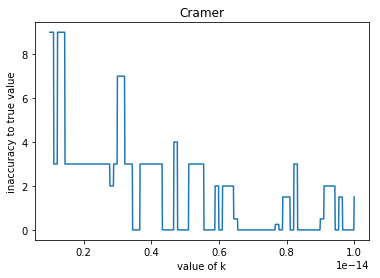

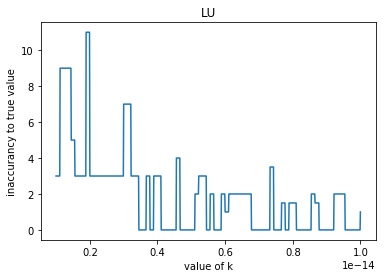

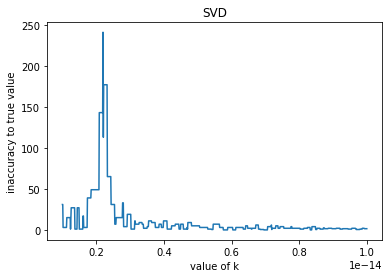

In [15]:
y = np.array([[5],[10],[15]])

k = []
acc_Cramer = []
acc_LU = []
acc_SVD = []

ki = 1*10**(-15)

while ki <= 1*10**(-14):

    A = np.array([[1, 1, 1],[1, 2, -1],[2, 3, ki]])
    
    x = solveCramer(A,y)
    acc = np.amax(abs(y - A @ x))
    acc_Cramer.append(acc)
    
    x = solveLU(A,y)
    acc = np.amax(abs(y - A @ x))
    acc_LU.append(acc)

    x = solveSVD(A,y)
    acc = np.amax(abs(y - A @ x))
    acc_SVD.append(acc)
    
    k.append(ki)
    ki += 1*10**(-17)



#Cramer
plt.plot(k,acc_Cramer)
plt.xlabel("value of k")
plt.ylabel("inaccuracy to true value")
plt.title("Cramer")
plt.show()

#LU
plt.plot(k,acc_LU)
plt.xlabel("value of k")
plt.ylabel("inaccurancy to true value")
plt.title("LU")
plt.show()

#SVD
plt.plot(k,acc_SVD)
plt.xlabel("value of k")
plt.ylabel("inaccuracy to true value")
plt.title("SVD")
plt.show()

In [ ]:
#Each of the three functions are used to solve the simultameous equation by using the matrix A and solving using the given
#right-hand side (y). The values of k were incremented from k=1e(-15) to k=1e(-14) to show how the accuracy changes as k gets 
#closer to zero. The accuracy was measuered by multiplying the result from the function by the matrix A which if accurate should
#give the right-hand side of the equation. If there is a difference then the largest difference in values of the three elements 
#of y was taken as the amount of inaccuracy for a given k.

#The results from the Cramer and LU functions give similar results showing a larger amount of inaccuracy closer to zero. The SVD
#method shows a low ammount inaccuracy over the range of k values except for a spike at roughly k=0.2. Both Cramer and LU had 
#smaller amounts of inaccuracy than SVD which suggests they are more accurate for matricies that are near singular.

**In this cell, briefly outline how your code solves the problems mentioned above, and discuss your results.**